### Brief summary

**Significant**
- Confidence in vehicle's capability (control, capability, decision-making) - 0.020
- Preference for a digital assistant in the future (IMPORTANT: *Nobody in the Lily group wanted to keep the same assistant!*) - 0.035

**Not significant**
- User Experience - 0.372
- Characteristics of AV ride experience - 0.690
- Trustworthy, Friendly, In Control - 0.245
- Usefulness of provided information - 0.120
- the degree to which the digital assistant distracted users from an awareness of being in an autonomous vehicle - 0.298
- Environmental distraction - 0.387

In [446]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import mannwhitneyu, kruskal
import re
%matplotlib inline

Loading endride data. Note that those who did not believe that the vehicle was autonomous were manually removed from the spreadsheet as was done in the preride and postride analyses.

In [447]:
df = pd.read_csv("endride_data_2.csv")

22 responses, same as the preride data

In [448]:
df.shape

(22, 53)

Remove timestamp and name

In [449]:
df = df[df.columns[2:]]

In [450]:
df.shape

(22, 51)

In [451]:
group_by_system = df.groupby(['System'])
group_by_system.size()

System
Julie    11
Lily     11
dtype: int64

In [452]:
# pd.DataFrame(list(df.columns.values))

In [564]:
# df.columns

### User experience - not significant

In [454]:
user_exp = df[df.columns[:6]]

In [455]:
user_exp.shape

(22, 6)

In [456]:
user_exp.groupby(["System"]).mean()

,"On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]"
System,,,,,
Julie,4.090909,4.181818,4.181818,3.818182,4.545455
Lily,3.818182,3.909091,3.636364,3.454545,4.545455


In [457]:
user_exp.groupby(["System"]).var()

,"On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]"
System,,,,,
Julie,0.690909,0.563636,0.763636,0.763636,0.472727
Lily,0.963636,0.490909,0.854545,0.672727,0.472727


Julie scored higher on average, except for "Willingness to ride again", where both Julie and Lily had the same average score.

In [458]:
user_exp.columns[1:6]

Index(['On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]',
       'On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]',
       'On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]',
       'On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]',
       'On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]'],
      dtype='object')

In [459]:
df_user_exp = df.assign(UX = user_exp[user_exp.columns[1:6]].aggregate(axis = 1, func = sum))

In [460]:
print(list(df_user_exp)[51])
analysis_column = list(df_user_exp)[-1]
x = df_user_exp.loc[df_user_exp['System']=='Julie'][analysis_column]
y = df_user_exp.loc[df_user_exp['System']=='Lily'][analysis_column]

UX


In [461]:
pd.pivot_table(df_user_exp, values=(analysis_column), index=['System'], aggfunc=np.mean)

,UX
System,
Julie,20.818182
Lily,19.363636


In [462]:
mannwhitneyu(x,y, alternative = 'two-sided')

MannwhitneyuResult(statistic=74.5, pvalue=0.37237387607788974)

pvalue=0.37237387607788974

### Confidence in vehicle's capability (control, capability, decision-making) - statistically significant

In [552]:
df.columns[6:9]

Index(['On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]',
       'On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]',
       'On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]'],
      dtype='object')

In [553]:
capability = df[df.columns[6:9]]

In [555]:
df_capability = df.assign(Capability = capability[capability.columns[:3]].aggregate(axis = 1, func = sum) / 3)

In [556]:
df_capability

,System,"On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]","On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]",Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interaction with the Digital assistant],...,Are there new features that would prefer we add?,Are there features you disliked and would prefer that we remove or improve in the future?,Please indicate if following attributes affected your riding experience: [Bumpiness],Please indicate if following attributes affected your riding experience: [Trip length],Please indicate if following attributes affected your riding experience: [Swirviness (side to side motion)],Please indicate if following attributes affected your riding experience: [Roundabouts],Please indicate if following attributes affected your riding experience: [Sudden stops],"Please comment on how the above factors affected your riding experience, if there were such factors.","Were there other factors that affected your riding experience? Please identify and comment, if there were such factors.",Capability
0,Julie,3,3,4,3,4,4,4,4,4,...,no,car was a bit cold and the ac was noisy,Yes,No,No,Yes,Yes,car went on stone cobbles which was unexpected,stone cobbles and bumpy ride,4.000000
1,Lily,5,5,4,4,5,4,4,4,5,...,"more comfortable seats. since i'm not driving,...",no,No,No,No,Yes,Yes,there was a sudden stop in front of someone cr...,no,4.000000
2,Julie,3,4,4,3,4,4,3,3,2,...,I think it might be better to see in front of ...,I prefer no T.V. if possible / to view in fron...,Yes,Yes,No,Yes,Yes,Going in a loop while it reroutes is pretty ja...,"Stops feel abrupt sometimes, going through spe...",3.333333
3,Julie,4,4,4,4,5,5,5,4,4,...,Ability to see out the window more and take aw...,The TV screen - it didn't help and made me fee...,Yes,No,No,Yes,Yes,I didn't like going around the traffic circle ...,No,4.666667
4,Lily,3,3,2,2,5,3,2,3,3,...,none that i can think of,None that I can think of.,Yes,No,No,Yes,Yes,Some of the above factors made me nervous abou...,I wish I could have seen out the front window ...,2.666667
5,Julie,4,5,5,4,5,5,4,4,5,...,cant think of any now,none,Yes,No,No,Yes,Yes,It was discomfort but if given to drive in an ...,NaN,4.333333
6,Lily,4,5,5,3,4,4,4,3,3,...,I would like the option to provide instruction...,whatever caused it to circle the roundabout 3 ...,Yes,No,No,Yes,Yes,The roundabouts seemed challenging for the veh...,sudden stop when encountering a pedestrian app...,3.666667
7,Julie,4,4,4,4,4,4,4,4,4,...,none,ride was bumpy on several locations,Yes,Yes,No,Yes,No,"riding 3x in the same roundabout is annoying, ...",none,4.000000
8,Lily,3,4,4,3,4,4,4,3,3,...,Switch away from low-hung GoPro in exchange fo...,nagging,Yes,No,No,No,Yes,accommodations in this van are far from plush,nausea from spatial dimensions of the gopro ca...,3.666667
9,Julie,5,5,5,5,5,5,4,5,5,...,None,No,No,No,No,Yes,Yes,"I felt that having the round-about, the sudden...","I think that experiencing people walking, ridi...",4.666667


In [557]:
print(list(df_capability)[-1])
analysis_column = list(df_capability)[-1]
x = df_capability.loc[df_capability['System']=='Julie'][analysis_column]
y = df_capability.loc[df_capability['System']=='Lily'][analysis_column]

Capability


In [561]:
df_capability.groupby(['System'])[list(df_capability)[-1]].mean()

System
Julie    4.272727
Lily     3.666667
Name: Capability, dtype: float64

In [560]:
df_capability.groupby(['System'])[list(df_capability)[-1]].var()

System
Julie    0.240404
Lily     0.333333
Name: Capability, dtype: float64

In [562]:
mannwhitneyu(x,y, alternative = 'two-sided')

MannwhitneyuResult(statistic=96.0, pvalue=0.01951748118217775)

pvalue=0.01951748118217775)

In [472]:
analysis_column = list(df_capability)[-1]
pd.pivot_table(df_capability, values=(analysis_column), index=['System'], aggfunc=np.mean)

,Capability
System,
Julie,4.272727
Lily,3.666667


In [473]:
df_capability_grouped = df_capability.groupby(['System']).mean()
capability2 = df_capability_grouped[df_capability_grouped.columns[5:8]]

In [474]:
df_capability_grouped_std = df_capability.groupby(['System']).std()
capability2_std = df_capability_grouped_std[df_capability_grouped_std.columns[5:8]]

In [475]:
capability2

,"On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]","On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]"
System,,,
Julie,4.636364,4.181818,4.000000
Lily,3.909091,3.818182,3.272727


In [476]:
capability2_std.iloc[0]

On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]                0.504525
On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]         0.603023
On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]    0.774597
Name: Julie, dtype: float64

In [477]:
capability2_std.iloc[1]

On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]                0.539360
On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]         0.750757
On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]    0.786245
Name: Lily, dtype: float64

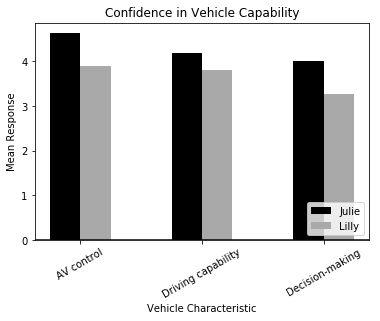

In [478]:
fig, ax = plt.subplots()
julie = capability2.groupby(['System']).mean().iloc[0]
lily = capability2.groupby(['System']).mean().iloc[1]
width = 0.25
ind = np.arange(3)
#julie_bars = ax.bar(ind, julie, width, color='r', label='Julie', yerr=capability2_std.iloc[0], capsize=5)
#lily_bars = ax.bar(ind + width, lily, width, color='g', label='Lilly', yerr=capability2_std.iloc[1], capsize=5)
#julie_bars = ax.bar(ind, julie, width, color='r', label='Julie', capsize=5)
#lily_bars = ax.bar(ind + width, lily, width, color='g', label='Lilly', capsize=5)
julie_bars = ax.bar(ind, julie, width, color='#000000', label='Julie', capsize=5)
lily_bars = ax.bar(ind + width, lily, width, color='#A9A9A9', label='Lilly', capsize=5)
ax.set_title('Confidence in Vehicle Capability')
ax.set_xticks(ind + width/2.0)
ax.set_xticklabels(('AV control', 'Driving capability', 'Decision-making'))
ax.axhline(y=0, color='k')
plt.xticks(rotation=30)
plt.xlabel('Vehicle Characteristic')
plt.ylabel('Mean Response')
legend = ax.legend()
for line in legend.get_lines():
    line.set_linewidth(4.0)
plt.legend(loc='lower right')
plt.savefig("confidence_endride.jpeg", dpi=300, bbox_inches = 'tight', pad_inches = 0)

### Characteristics of AV ride experience - not significant

In [479]:
df.columns[9:12]

Index(['Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interaction with the Digital assistant]',
       'Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interior vehicle accomodations ]',
       'Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [The drive / driving route ]'],
      dtype='object')

In [480]:
ride_exp = df[df.columns[9:12]]

In [481]:
df.groupby(['System'])[df.columns[9:12]].var()

,Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interaction with the Digital assistant],Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interior vehicle accomodations ],Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [The drive / driving route ]
System,,,
Julie,1.090909,1.872727,0.563636
Lily,1.163636,1.418182,2.018182


In [482]:
df_ride_exp = df.assign(Ride_Exp = ride_exp[ride_exp.columns[:3]].aggregate(axis = 1, func = sum))

In [483]:
print(list(df_ride_exp)[-1])
analysis_column = list(df_ride_exp)[-1]
x = df_ride_exp.loc[df_ride_exp['System']=='Julie'][analysis_column]
y = df_ride_exp.loc[df_ride_exp['System']=='Lily'][analysis_column]

Ride_Exp


In [484]:
mannwhitneyu(x,y, alternative = 'two-sided')

MannwhitneyuResult(statistic=67.0, pvalue=0.6904192245963843)

pvalue=0.6904192245963843)

### Trustworthy, Friendly, In Control - not significant

In [485]:
df.columns[12:15]

Index(['On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Trustworthy]',
       'On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Friendly]',
       'On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [In Control]'],
      dtype='object')

In [486]:
trust = df[df.columns[12:15]]

In [487]:
df.groupby(['System'])[df.columns[12:15]].var()

,"On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Trustworthy]","On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Friendly]","On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [In Control]"
System,,,
Julie,0.563636,1.290909,0.800000
Lily,1.472727,1.363636,1.272727


In [567]:
df_trust = df.assign(Trust = df[df.columns[12:15]].aggregate(axis = 1, func = sum) / 3)

In [568]:
print(list(df_trust)[-1])
analysis_column = list(df_trust)[-1]
x = df_trust.loc[df_trust['System']=='Julie'][analysis_column]
y = df_trust.loc[df_trust['System']=='Lily'][analysis_column]

Trust


In [569]:
mannwhitneyu(x,y, alternative = 'two-sided')

MannwhitneyuResult(statistic=78.5, pvalue=0.24537030363424872)

pvalue=0.24537030363424872

### Usefulness of provided information - not significant

In [491]:
df.columns[17]

'How useful was the information presented throughout the ride? '

In [492]:
print(list(df)[17])
x = df.loc[df['System']=='Julie'][list(df)[17]]
y = df.loc[df['System']=='Lily'][list(df)[17]]

How useful was the information presented throughout the ride? 


In [493]:
mannwhitneyu(x,y, alternative = 'two-sided')

MannwhitneyuResult(statistic=84.0, pvalue=0.12042973410056898)

pvalue=0.12042973410056898

### Preference for a digital assistant - significant

In [494]:
df.columns[34]

'For a future ride, I would prefer to:'

In [495]:
df[df.columns[34]].replace({'Try another assistant':1,'No preference':3,'Keep the same assistant': 5})

0     5
1     3
2     1
3     5
4     1
5     1
6     1
7     3
8     1
9     3
10    1
11    1
12    3
13    1
14    1
15    1
16    1
17    5
18    5
19    1
20    5
21    3
Name: For a future ride, I would prefer to:, dtype: int64

In [496]:
print(list(df)[34])
df[df.columns[34]].replace({'Try another assistant':-1,'No preference':0,'Keep the same assistant': 1}, inplace=True)
x = df.loc[df['System']=='Julie'][list(df)[34]]
y = df.loc[df['System']=='Lily'][list(df)[34]]

For a future ride, I would prefer to:


In [497]:
df.groupby(['System'])[df.columns[34]].var()

System
Julie    0.890909
Lily     0.218182
Name: For a future ride, I would prefer to:, dtype: float64

In [498]:
x

0     1
2    -1
3     1
5    -1
7     0
9     0
11   -1
15   -1
17    1
18    1
20    1
Name: For a future ride, I would prefer to:, dtype: int64

In [499]:
mannwhitneyu(x,y, alternative = 'two-sided')

MannwhitneyuResult(statistic=90.0, pvalue=0.03501555442686633)

In [500]:
df.groupby(['System'])[df.columns[34]].value_counts()

System  For a future ride, I would prefer to:
Julie    1                                       5
        -1                                       4
         0                                       2
Lily    -1                                       8
         0                                       3
Name: For a future ride, I would prefer to:, dtype: int64

pvalue=0.03501555442686633

*Nobody in the Lily group wanted to keep the same assistant!*

## Assistant as a distraction - not significant

In [501]:
print(list(df)[30])
x = df.loc[df['System']=='Julie'][list(df)[30]]
y = df.loc[df['System']=='Lily'][list(df)[30]]

On a scale from 1-5, please rate the degree to which the digital assistant distracted you from an awareness of being in an AV? 


In [502]:
mannwhitneyu(x,y, alternative = 'two-sided')

MannwhitneyuResult(statistic=76.5, pvalue=0.29773750380731034)

pvalue=0.29773750380731034

In [503]:
x.mean(), y.mean()

(3.0, 2.4545454545454546)

In [504]:
x.sum(), y.sum()

(33, 27)

In [505]:
df.groupby(['System'])[df.columns[30]].var()

System
Julie    1.000000
Lily     3.072727
Name: On a scale from 1-5, please rate the degree to which the digital assistant distracted you from an awareness of being in an AV? , dtype: float64

In [506]:
x.var(), y.var()

(1.0, 3.0727272727272723)

Overall, though, on average Julie helped distract users more

## Environmental Distractions - significant

In [507]:
distraction = df[df.columns[:-2]]
distraction = distraction.drop(distraction.columns[1:-5],axis=1)

In [508]:
distraction = distraction.replace({'Yes':1,'No':0})
df_distraction = distraction.assign(Distractions = distraction[distraction.columns[1:6]].aggregate(axis = 1, func = sum) / 5)
df_distraction

,System,Please indicate if following attributes affected your riding experience: [Bumpiness],Please indicate if following attributes affected your riding experience: [Trip length],Please indicate if following attributes affected your riding experience: [Swirviness (side to side motion)],Please indicate if following attributes affected your riding experience: [Roundabouts],Please indicate if following attributes affected your riding experience: [Sudden stops],Distractions
0,Julie,1,0,0,1,1,0.6
1,Lily,0,0,0,1,1,0.4
2,Julie,1,1,0,1,1,0.8
3,Julie,1,0,0,1,1,0.6
4,Lily,1,0,0,1,1,0.6
5,Julie,1,0,0,1,1,0.6
6,Lily,1,0,0,1,1,0.6
7,Julie,1,1,0,1,0,0.6
8,Lily,1,0,0,0,1,0.4
9,Julie,0,0,0,1,1,0.4


In [509]:
df_distraction.groupby(['System']).sum()

,Please indicate if following attributes affected your riding experience: [Bumpiness],Please indicate if following attributes affected your riding experience: [Trip length],Please indicate if following attributes affected your riding experience: [Swirviness (side to side motion)],Please indicate if following attributes affected your riding experience: [Roundabouts],Please indicate if following attributes affected your riding experience: [Sudden stops],Distractions
System,,,,,,
Julie,7,2,1,10,8,5.6
Lily,5,1,0,10,8,4.8


In [510]:
df_distraction.groupby(['System']).var()

,Please indicate if following attributes affected your riding experience: [Bumpiness],Please indicate if following attributes affected your riding experience: [Trip length],Please indicate if following attributes affected your riding experience: [Swirviness (side to side motion)],Please indicate if following attributes affected your riding experience: [Roundabouts],Please indicate if following attributes affected your riding experience: [Sudden stops],Distractions
System,,,,,,
Julie,0.254545,0.163636,0.090909,0.090909,0.218182,0.042909
Lily,0.272727,0.090909,0.000000,0.090909,0.218182,0.022545


In [511]:
print(list(df_distraction)[-1])
analysis_column = list(df_distraction)[-1]
x = df_distraction.loc[df_distraction['System']=='Julie'][analysis_column]
y = df_distraction.loc[df_distraction['System']=='Lily'][analysis_column]

Distractions


In [512]:
mannwhitneyu(x,y, alternative = 'two-sided')

MannwhitneyuResult(statistic=73.5, pvalue=0.3866389938839727)

MannwhitneyuResult(statistic=73.5, pvalue=0.3866389938839727)

In [513]:
x = df_distraction.loc[df_distraction['System']=='Julie'][list(df_distraction)[1]]
y = df_distraction.loc[df_distraction['System']=='Lily'][list(df_distraction)[1]]
print(mannwhitneyu(x,y, alternative = 'two-sided'))

x = df_distraction.loc[df_distraction['System']=='Julie'][list(df_distraction)[2]]
y = df_distraction.loc[df_distraction['System']=='Lily'][list(df_distraction)[2]]
print(mannwhitneyu(x,y, alternative = 'two-sided'))

x = df_distraction.loc[df_distraction['System']=='Julie'][list(df_distraction)[3]]
y = df_distraction.loc[df_distraction['System']=='Lily'][list(df_distraction)[3]]
print(mannwhitneyu(x,y, alternative = 'two-sided'))

x = df_distraction.loc[df_distraction['System']=='Julie'][list(df_distraction)[4]]
y = df_distraction.loc[df_distraction['System']=='Lily'][list(df_distraction)[4]]
print(mannwhitneyu(x,y, alternative = 'two-sided'))

x = df_distraction.loc[df_distraction['System']=='Julie'][list(df_distraction)[5]]
y = df_distraction.loc[df_distraction['System']=='Lily'][list(df_distraction)[5]]
print(mannwhitneyu(x,y, alternative = 'two-sided'))

MannwhitneyuResult(statistic=71.5, pvalue=0.424504972218789)
MannwhitneyuResult(statistic=66.0, pvalue=0.5810872693281479)
MannwhitneyuResult(statistic=66.0, pvalue=0.36330214088689794)
MannwhitneyuResult(statistic=60.5, pvalue=0.9474814093785361)
MannwhitneyuResult(statistic=60.5, pvalue=0.9660850980128011)


MannwhitneyuResult(statistic=71.5, pvalue=0.424504972218789)
MannwhitneyuResult(statistic=66.0, pvalue=0.5810872693281479)
MannwhitneyuResult(statistic=66.0, pvalue=0.36330214088689794)
MannwhitneyuResult(statistic=60.5, pvalue=0.9474814093785361)
MannwhitneyuResult(statistic=60.5, pvalue=0.9660850980128011)

In [514]:
distraction.groupby(['System']).mean()

,Please indicate if following attributes affected your riding experience: [Bumpiness],Please indicate if following attributes affected your riding experience: [Trip length],Please indicate if following attributes affected your riding experience: [Swirviness (side to side motion)],Please indicate if following attributes affected your riding experience: [Roundabouts],Please indicate if following attributes affected your riding experience: [Sudden stops]
System,,,,,
Julie,0.636364,0.181818,0.090909,0.909091,0.727273
Lily,0.454545,0.090909,0.000000,0.909091,0.727273


In [515]:
distraction.iloc[0].shape

(6,)

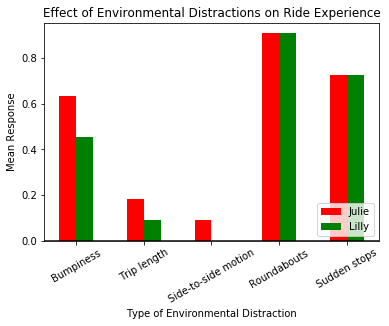

In [516]:
fig, ax = plt.subplots()
julie = distraction.groupby(['System']).mean().iloc[0]
lily = distraction.groupby(['System']).mean().iloc[1]
width = 0.25
ind = np.arange(5)
julie_bars = ax.bar(ind, julie, width, color='r', label='Julie')
lily_bars = ax.bar(ind + width, lily, width, color='g', label='Lilly')
ax.set_title('Effect of Environmental Distractions on Ride Experience')
ax.set_xticks(ind + width/2.0)
ax.set_xticklabels(('Bumpiness', 'Trip length', 'Side-to-side motion', 'Roundabouts', 'Sudden stops'))
ax.axhline(y=0, color='k')
plt.xticks(rotation=30)
plt.xlabel('Type of Environmental Distraction')
plt.ylabel('Mean Response')
legend = ax.legend()
for line in legend.get_lines():
    line.set_linewidth(4.0)
plt.legend(loc='lower right')
plt.savefig("enviro_endride.jpeg", dpi=300, bbox_inches = 'tight', pad_inches = 0)

### Adjectives describing the AV

Here we extract the adjectives users specified to describe the AV.

**Please check all adjectives that would best describe the self-driving vehicle (select all that apply)**: Julie

In [517]:
all_adj_resp = df[["System", 'Please check all adjectives that would best describe the self-driving vehicle (select all that apply).']]

In [518]:
julie_words1 = all_adj_resp[all_adj_resp.System.str.contains('Julie')]

In [519]:
julie_words1

,System,Please check all adjectives that would best describe the self-driving vehicle (select all that apply).
0,Julie,"Helpful, Informative, Proactive"
2,Julie,"Cold, Indifferent, Passive, Trustworthy"
3,Julie,"Helpful, Proactive, Trustworthy"
5,Julie,"Comforting, Friendly, Helpful"
7,Julie,"Friendly, Helpful, Informative"
9,Julie,"Comforting, Friendly, Helpful, Informative, Ki..."
11,Julie,"Friendly, Helpful, Kind"
15,Julie,"Indifferent, Passive"
17,Julie,"Friendly, Helpful, Informative, Proactive, Tru..."
18,Julie,"Comforting, Friendly, Informative, Kind, Trust..."


In [520]:
lily_words1 = all_adj_resp[all_adj_resp.System.str.contains('Lily')]

In [521]:
len(lily_words1)

11

In [522]:
posArr = []
negArr = []
for word in open('positive-words.txt', 'r').readlines()[35:]:
    word = word.rstrip()
    posArr.append(word)
for word in open('negative-words.txt', 'r').readlines()[35:]:
    word = word.rstrip()
    negArr.append(word)
print ("num of positive words %d" % len(posArr))
print ("num of negative words %d" % len(negArr))

num of positive words 2006
num of negative words 4783


In [523]:
for index, row in all_adj_resp.iterrows():
    if ',' in row[1]:
        row[1] = re.split(', ',row[1])
    else:
        row[1] = re.split(' ', row[1])

In [524]:
all_adj_resp

,System,Please check all adjectives that would best describe the self-driving vehicle (select all that apply).
0,Julie,"[Helpful, Informative, Proactive]"
1,Lily,"[Indifferent, Proactive, Trustworthy]"
2,Julie,"[Cold, Indifferent, Passive, Trustworthy]"
3,Julie,"[Helpful, Proactive, Trustworthy]"
4,Lily,"[Helpful, Informative, Passive]"
5,Julie,"[Comforting, Friendly, Helpful]"
6,Lily,[Proactive]
7,Julie,"[Friendly, Helpful, Informative]"
8,Lily,"[Cold, Indifferent, Passive]"
9,Julie,"[Comforting, Friendly, Helpful, Informative, K..."


## Mann-Whitney U Test: Sentiment of adjectives used to describe the assistant

In [525]:
adjs = all_adj_resp
for index, row in adjs.iterrows():
    posNum = 0
    negNum = 0
    for word in row[1]:
        word = word.lower()
        if word in posArr:
            posNum += 1
        if word in negArr:
            negNum -= 1
    total = posNum + negNum
    #print(posNum, negNum)
    adjs.loc[index,'Total'] = total

In [526]:
adjs

,System,Please check all adjectives that would best describe the self-driving vehicle (select all that apply).,Total
0,Julie,"[Helpful, Informative, Proactive]",2.0
1,Lily,"[Indifferent, Proactive, Trustworthy]",1.0
2,Julie,"[Cold, Indifferent, Passive, Trustworthy]",-2.0
3,Julie,"[Helpful, Proactive, Trustworthy]",3.0
4,Lily,"[Helpful, Informative, Passive]",0.0
5,Julie,"[Comforting, Friendly, Helpful]",3.0
6,Lily,[Proactive],1.0
7,Julie,"[Friendly, Helpful, Informative]",2.0
8,Lily,"[Cold, Indifferent, Passive]",-3.0
9,Julie,"[Comforting, Friendly, Helpful, Informative, K...",5.0


In [527]:
julie_adj = adjs.loc[adjs['System']=="Julie"][adjs.columns[2]]
lily_adj = adjs.loc[adjs['System']=="Lily"][adjs.columns[2]]

In [528]:
julie_adj.mean()

2.090909090909091

In [529]:
lily_adj.mean()

-0.18181818181818182

In [530]:
mannwhitneyu(julie_adj, lily_adj, alternative = 'two-sided')

MannwhitneyuResult(statistic=102.0, pvalue=0.0064193068057014245)

pvalue=0.0064193068057014245

### Adjectives describing the assistant

Here we extract the custom adjectives users specified to describe their assigned assistant.

**Please specify any other adjectives that would best describe the assistant not included in the list above.**: Julie

In [531]:
all_more_adj_resp = df[["System", 'Please specify any other adjectives that would best describe the assistant not included in the list above.']]

In [532]:
adjs_more = all_more_adj_resp.dropna()

In [533]:
for index, row in adjs_more.iterrows():
    if ',' in row[1]:
        row[1] = re.split(', ',row[1])
    else:
        row[1] = re.split(' ', row[1])

In [534]:
adjs_more.shape

(12, 2)

In [535]:
adjs_more

,System,Please specify any other adjectives that would best describe the assistant not included in the list above.
1,Lily,[robotic]
3,Julie,[Personable]
4,Lily,"[curious, ]"
6,Lily,[calm]
7,Julie,[efficient]
10,Lily,[Convenient]
11,Julie,"[Bumbling, determined, confident]"
12,Lily,"[ability, to, handle, construction, activity]"
13,Lily,[Indecisive]
14,Lily,"[intimidating, ground-breaking, efficient, ""gr..."


In [536]:
for index, row in adjs_more.iterrows():
    posNum = 0
    negNum = 0
    for word in row[1]:
        word = word.replace('"', '').lower()
        if word in posArr:
            posNum += 1
        if word in negArr:
            negNum -= 1
    total = posNum + negNum
    adjs_more.loc[index,'Total'] = total

In [537]:
adjs_more

,System,Please specify any other adjectives that would best describe the assistant not included in the list above.,Total
1,Lily,[robotic],0.0
3,Julie,[Personable],0.0
4,Lily,"[curious, ]",0.0
6,Lily,[calm],1.0
7,Julie,[efficient],1.0
10,Lily,[Convenient],1.0
11,Julie,"[Bumbling, determined, confident]",1.0
12,Lily,"[ability, to, handle, construction, activity]",0.0
13,Lily,[Indecisive],-1.0
14,Lily,"[intimidating, ground-breaking, efficient, ""gr...",0.0


In [538]:
adjs_more.shape

(12, 3)

In [539]:
julie_adj2 = adjs_more.loc[adjs['System']=="Julie"][adjs_more.columns[2]]
lily_adj2 = adjs_more.loc[adjs['System']=="Lily"][adjs_more.columns[2]]

In [540]:
julie_adj2.mean()

0.75

In [541]:
lily_adj2.mean()

0.25

In [542]:
mannwhitneyu(julie_adj2, lily_adj2, alternative = 'two-sided')

MannwhitneyuResult(statistic=22.5, pvalue=0.25683925795785656)

In [543]:
julie_words2 = all_more_adj_resp[all_more_adj_resp.System.str.contains('Julie')]

In [544]:
len(julie_words2)

11

In [545]:
lily_words2 = all_more_adj_resp[all_more_adj_resp.System.str.contains('Lily')]

In [546]:
len(lily_words2)

11

In [547]:
def getWords(allWords):
    print(allWords)
    words = []
    for index,row in allWords.iterrows():
        if isinstance(row[1],str):
            if ',' in row[1]:
                words.extend(row[1].split(','))
            else:
                words.extend(row[1].split(' '))
    words = [word.strip().lower() for word in words]
    words = ' '.join(words)
    return words

In [548]:
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = 30
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

# https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly
def makeWordcloud(allWords, title, num):
    words = getWords(allWords)
    wordcloud = WordCloud(font_path="AmaticSC-Bold.ttf",collocations=False,
                          max_words=25,
                          background_color = 'white',
                          width = 960,
                          height = 960,
                          max_font_size=300,
                          random_state = 42,
                          color_func = random_color_func).generate(words)
    # print(wordcloud.words_)
    print("Number of words =", len(wordcloud.words_))
    # print(list(wordcloud.words_.keys()))
    fig.add_subplot(1, 2, num)
    plt.imshow(wordcloud)
    plt.title(label=title, fontdict={'fontsize':20})
    plt.axis('off')

   System  \
0   Julie   
2   Julie   
3   Julie   
5   Julie   
7   Julie   
9   Julie   
11  Julie   
15  Julie   
17  Julie   
18  Julie   
20  Julie   

   Please check all adjectives that would best describe the self-driving vehicle (select all that apply).  
0                     Helpful, Informative, Proactive                                                      
2             Cold, Indifferent, Passive, Trustworthy                                                      
3                     Helpful, Proactive, Trustworthy                                                      
5                       Comforting, Friendly, Helpful                                                      
7                      Friendly, Helpful, Informative                                                      
9   Comforting, Friendly, Helpful, Informative, Ki...                                                      
11                            Friendly, Helpful, Kind                                  

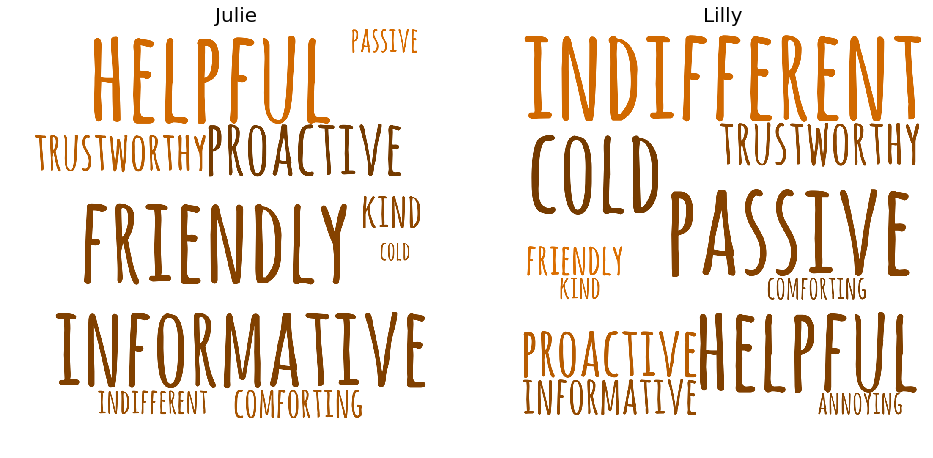

In [549]:
fig=plt.figure(figsize=(16, 16))
makeWordcloud(julie_words1, "Julie", 1)
makeWordcloud(lily_words1, "Lilly", 2)
plt.show()

   System  \
0   Julie   
2   Julie   
3   Julie   
5   Julie   
7   Julie   
9   Julie   
11  Julie   
15  Julie   
17  Julie   
18  Julie   
20  Julie   

   Please specify any other adjectives that would best describe the assistant not included in the list above.  
0                                                 NaN                                                          
2                                                 NaN                                                          
3                                          Personable                                                          
5                                                 NaN                                                          
7                                           efficient                                                          
9                                                 NaN                                                          
11                    Bumbling, determined, confident      

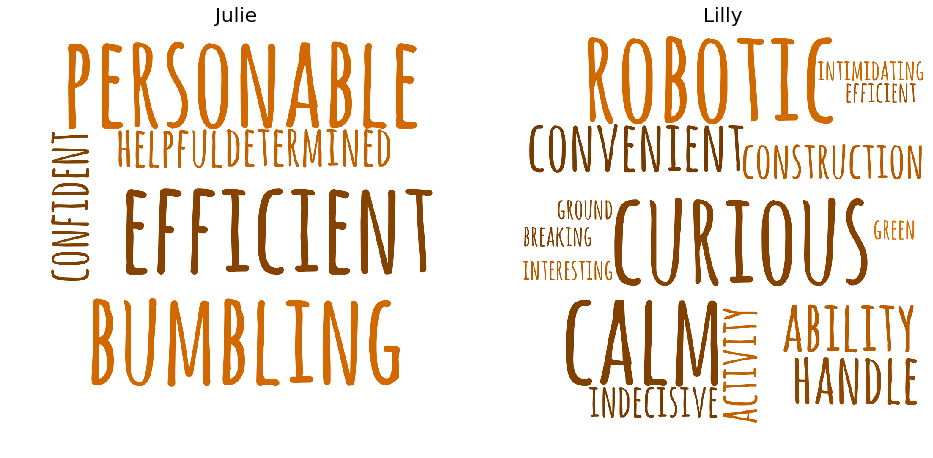

In [550]:
fig=plt.figure(figsize=(16, 16))
makeWordcloud(julie_words2, "Julie", 1)
makeWordcloud(lily_words2, "Lilly", 2)
plt.show()